# SECTION 1: Load Libraries


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Set styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# SECTION 2: Load and Inspect Data

In [24]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# SECTION 3: Data Overview


In [25]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Shape: (541909, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicate Rows: 5268


# SECTION 4: Data Cleaning

In [26]:
# Drop rows with missing CustomerID (usually cannot identify buyer)
df = df.dropna(subset=['CustomerID'])

In [27]:
# Remove duplicates
df = df.drop_duplicates()

In [28]:
# Remove canceled transactions (negative quantities)
df = df[df['Quantity'] > 0]

In [29]:
# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [30]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [31]:
# SECTION 5: Summary Statistics
print("\nSummary Statistics:\n", df.describe())
print("\nTop 5 Countries by Transactions:\n", df['Country'].value_counts().head())



Summary Statistics:
             Quantity                    InvoiceDate      UnitPrice  \
count  392732.000000                         392732  392732.000000   
mean       13.153718  2011-07-10 19:15:24.576301568       3.125596   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       181.588420                            NaN      22.240725   

          CustomerID     TotalPrice  
count  392732.000000  392732.000000  
mean    15287.734822      22.629195  
min     12346.000000       0.000000  
25%     13955.000000       4.950000  
50%     15150.000000      12.390000  
75%     16791.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.567773     311.083465  

Top 

# SECTION 6: Visualizations

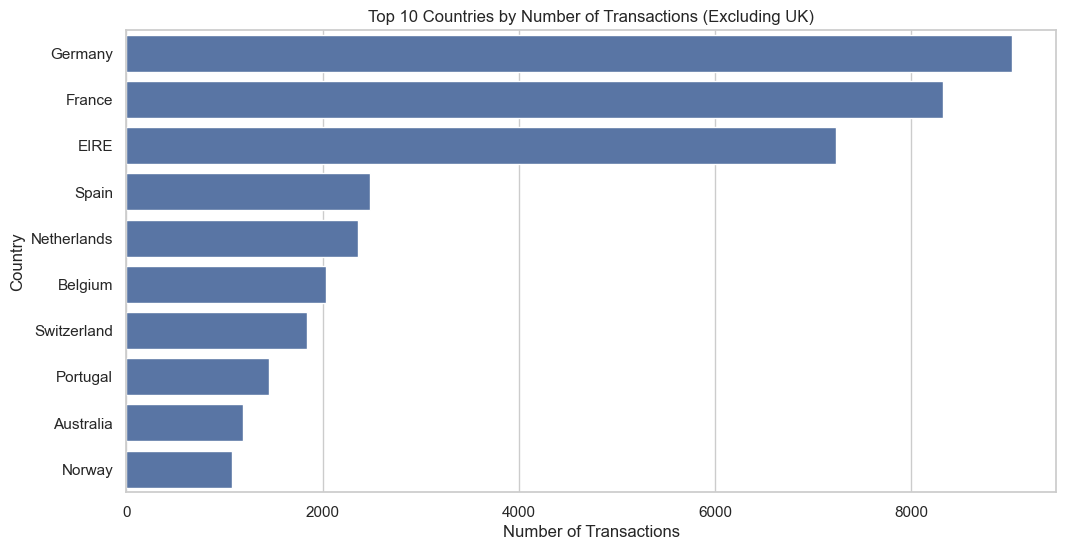

In [32]:
# 1. Top-selling countries (excluding UK for variety)
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Number of Transactions (Excluding UK)")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()


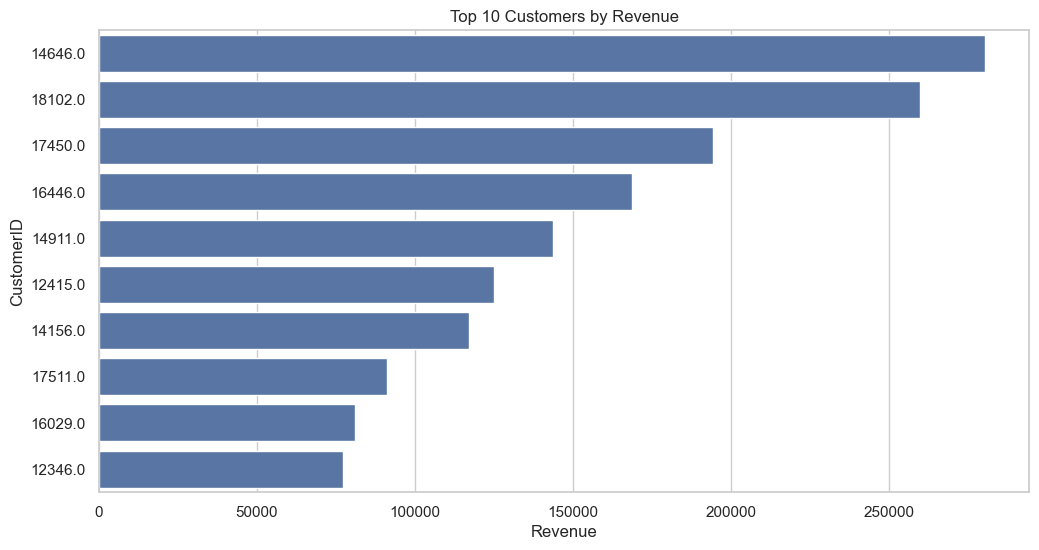

In [33]:
# 2. Top customers by revenue
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("CustomerID")
plt.show()


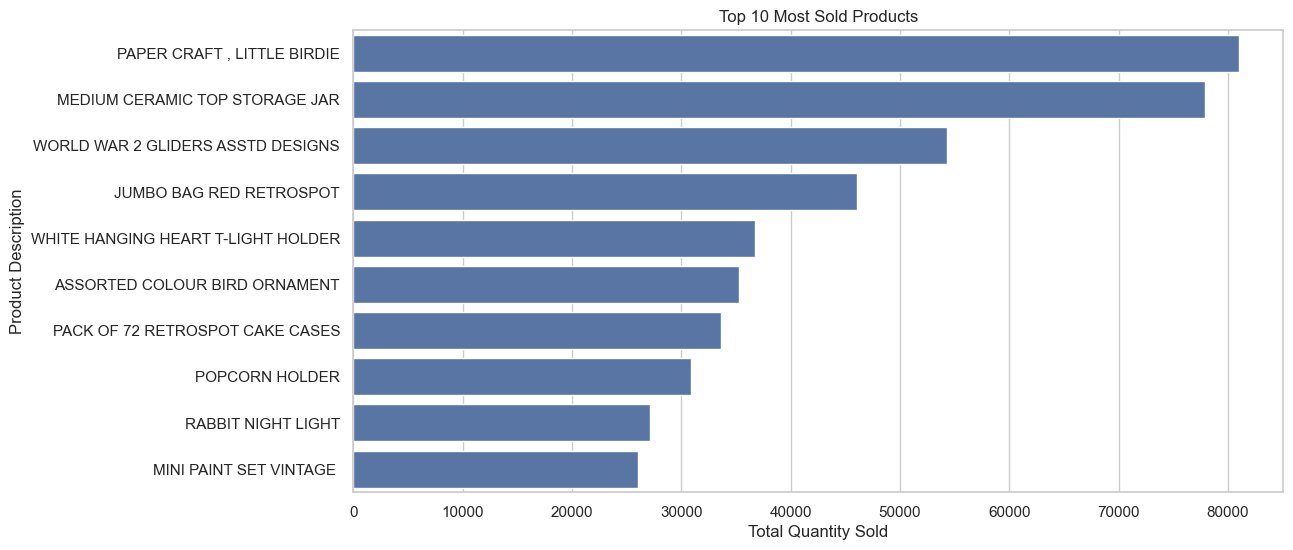

In [34]:
# 3. Most sold products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()


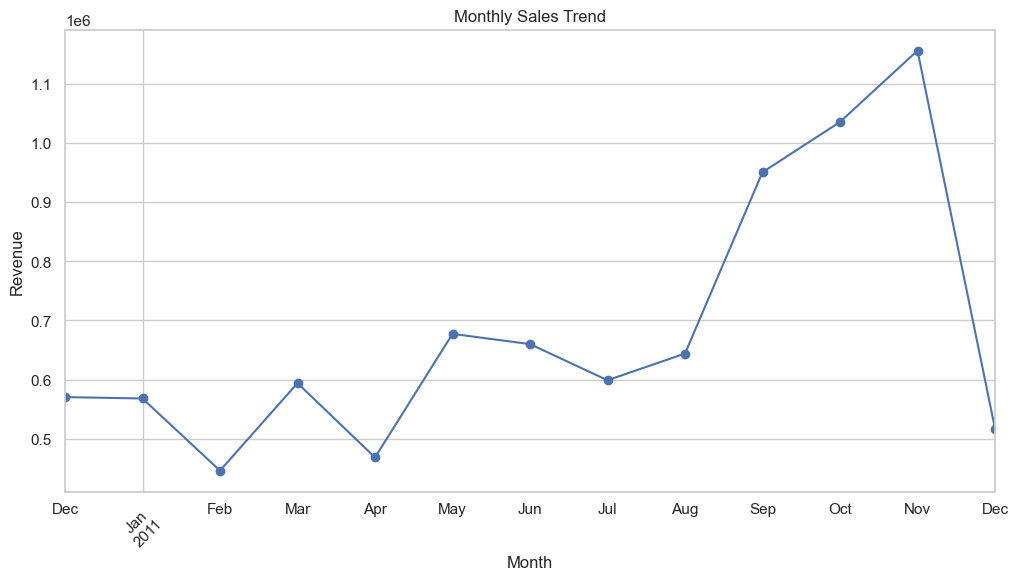

In [35]:
# 4. Monthly sales trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


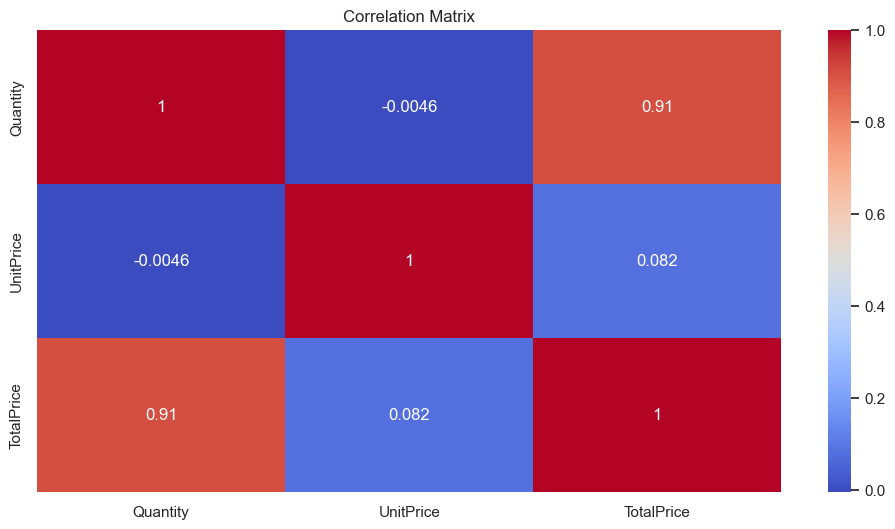

In [36]:
# 5. Correlation heatmap
corr = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [37]:
# SECTION 7: Key Insights
# Print out a few textual insights
print("Key Insights:")
print("- The UK is the dominant market in terms of number of transactions.")
print("- Revenue is highly skewed; a few customers contribute significantly.")
print("- Top-selling products include stationery and home items.")
print("- There is a general increase in sales in certain months indicating seasonal effects.")


Key Insights:
- The UK is the dominant market in terms of number of transactions.
- Revenue is highly skewed; a few customers contribute significantly.
- Top-selling products include stationery and home items.
- There is a general increase in sales in certain months indicating seasonal effects.
